### Configuración

Primero se cargan las librerías necesarias para el desarrollo del _notebook_

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from yaml import safe_load
from scipy.stats import bernoulli
from matplotlib.ticker import ScalarFormatter

Ahora se definen rutas relativas al _notebook_, para una adecuada manipulación de archivos dentro del directorio raíz.

In [2]:
# Ruta a directorio raíz
ROOT = os.path.dirname(os.getcwd())

# Abrir archivo de configuración
with open(file=os.path.join(ROOT, 'config.yml'), mode='r') as _file:
    CONFIG = safe_load(_file)
_file.close()

# 1. Espacio parametral

Ejemplo de lanzamientos de una moneda, primero se construye un dataframe con lanzamientos independientes de una moneda justa

In [3]:
n = 1_000

moneda = (
    # Generar dataframe con n realizaciones bernoulli
    pd.DataFrame(
        data={
            'lanzamiento': np.arange(1, n+1, 1)
            # 0: Águila, 1: Sol
            ,'moneda': bernoulli.rvs(p=0.5, loc=0, size=n, random_state=123)
            }
        )
    # Asignar columnas computadas
    .assign(
        # Acumulado de Sol
        acumulado = lambda _df: _df.moneda.cumsum()
        # Probabilidad acumulada de Sol
        ,prob = lambda _df: _df.acumulado / _df.lanzamiento
    )
)

moneda.head()

,lanzamiento,moneda,acumulado,prob
0,1,1,1,1.000000
1,2,0,1,0.500000
2,3,0,1,0.333333
3,4,1,2,0.500000
4,5,1,3,0.600000


Ahora se visualiza la probabilidad a lo largo de las realizaciones realizadas

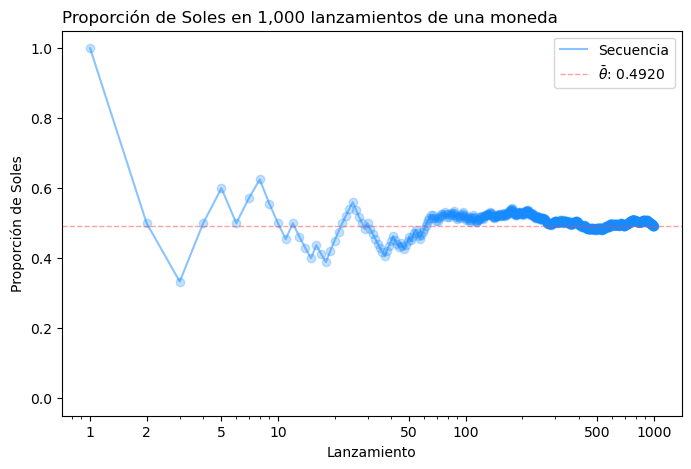

In [4]:
# Configuración de figura
fig, ax = plt.subplots(figsize=(8,5))

# Estilo de los ejes
ax.set_xscale('log')
ax.set_xticks(ticks=np.array([1,2,5,10,50,100,500,1000]))
ax.get_xaxis().set_major_formatter(ScalarFormatter())

ax.set_ylim(bottom=-0.05, top=1.05)

# Elementos de visualización
ax.plot(
    moneda.lanzamiento
    ,moneda.prob
    ,c=CONFIG['graficas']['colors']['azul']
    ,alpha=0.5
    ,label='Secuencia')
ax.scatter(
    x=moneda.lanzamiento
    ,y=moneda.prob
    ,color=CONFIG['graficas']['colors']['azul']
    ,alpha=0.25)
ax.axhline(
    y=moneda.loc[n-1, 'prob']
    ,linestyle='--'
    ,linewidth=1
    ,color=CONFIG['graficas']['colors']['rojo']
    ,alpha=0.5
    ,label=rf"$\bar\theta$: {moneda.loc[n-1, 'prob']:.4f}"
)

# Anotaciones de figura
ax.set_title(f'Proporción de Soles en {n:,} lanzamientos de una moneda', loc='left')
ax.set_xlabel('Lanzamiento')
ax.set_ylabel('Proporción de Soles')
ax.legend()

plt.show()